##  Impact of Cigarette Tax Hike on Smoking Rates

### Background

Public health officials have suggested that higher cigarette taxes can decrease smoking rates among pregnant women. On May 1, 1994, Michigan raised the cigarette tax from 25 to 75 cents per pack.

### Data

The dataset `lecture4_DD.csv` contains data on:
- **state**: 2-digit state FIPS code (Michigan = 26, Iowa = 19)
- **smoked**: Dummy variable (1 if the mother smoked during pregnancy, 0 otherwise)
- **year**: Time period (1 = May 1, 1992 - April 30, 1993, 2 = May 1, 1993 - April 30, 1994, 3 = May 1, 1994 - April 30, 1995)

### Methodology

We use the differences-in-differences technique, with Michigan as the treatment group and Iowa as the control group, to evaluate the impact of the tax hike on smoking rates.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt


In [3]:
# Load the dataset
data_dd = pd.read_csv('assets/lecture4_DD.csv')

# Display the first few rows of the dataset
data_dd.head()

,state,smoked,year
0,19,0,1
1,19,0,1
2,19,0,1
3,19,0,1
4,19,0,1


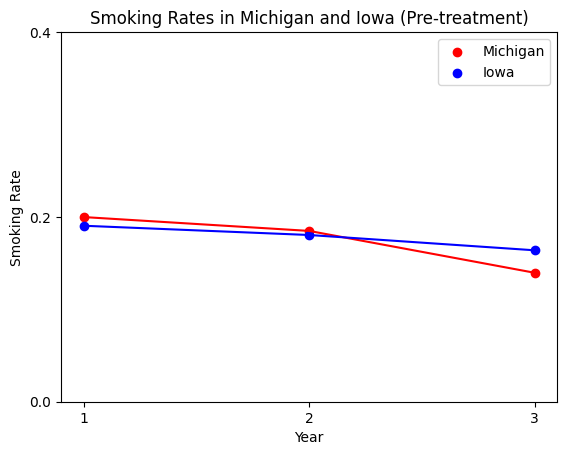

In [4]:
# Calculate smoking rates by state and year
smoke_rate = data_dd.groupby(['state', 'year']).mean().reset_index()

# Plot pre-treatment smoking rates for Michigan and Iowa
mi = smoke_rate[(smoke_rate['state'] == 26)]
ia = smoke_rate[(smoke_rate['state'] == 19)]

plt.scatter(mi['year'], mi['smoked'], color='red', label='Michigan')
plt.plot(mi['year'], mi['smoked'], color='red')
plt.scatter(ia['year'], ia['smoked'], color='blue', label='Iowa')
plt.plot(ia['year'], ia['smoked'], color='blue')
plt.xlabel('Year')
plt.ylabel('Smoking Rate')
plt.legend()
plt.yticks(np.arange(0, 0.41, step=0.2))
plt.xticks(range(1, 4))
plt.title('Smoking Rates in Michigan and Iowa (Pre-treatment)')
plt.show()

### Visual Inspection

Based on the graph, the parallel trends assumption is slightly violated as the smoking rates in Michigan decrease more than in Iowa before the treatment. Therefore, differences-in-differences may not be the most reasonable approach to estimate the causal effect in this setting.

### Differences-in-Differences Table

To calculate the differences-in-differences estimate, we first add binary variables for treatment and post-treatment periods.

In [6]:
# Add binary variables for treatment and post-treatment periods
data_dd['treat'] = np.where(data_dd['state'] == 26, 1, 0)
data_dd['post'] = np.where(data_dd['year'] == 3, 1, 0)

# Display the first few rows of the updated dataset
data_dd.head()

,state,smoked,year,treat,post
0,19,0,1,0,0
1,19,0,1,0,0
2,19,0,1,0,0
3,19,0,1,0,0
4,19,0,1,0,0


In [7]:
# Calculate the corresponding means of the variable smoked
treat_post = data_dd.groupby(['post', 'treat'])['smoked'].mean().reset_index()

cell_i = round(treat_post.iloc[1, -1], 4)
cell_ii = round(treat_post.iloc[3, -1], 4)
cell_iii = round(cell_ii - cell_i, 4)
cell_iv = round(treat_post.iloc[0, -1], 4)
cell_v = round(treat_post.iloc[2, -1], 4)
cell_vi = round(cell_v - cell_iv, 4)
cell_vii = round(cell_i - cell_iv, 4)
cell_viii = round(cell_ii - cell_v, 4)
cell_ix = round(cell_iii - cell_vi, 4)

cell_i, cell_ii, cell_iii, cell_iv, cell_v, cell_vi, cell_vii, cell_viii, cell_ix

(0.1923, 0.1396, -0.0527, 0.1856, 0.1639, -0.0217, 0.0067, -0.0243, -0.031)

### Regression Analysis

We will now estimate differences-in-differences through regression.

In [12]:
# Regress smoked on treat, post
#, and their interaction using robust standard errors
reg_cluster_se = smf.ols(formula='smoked ~ treat + post + treat*post', data=data_dd).fit()

In [14]:
reg_cluster_se.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 smoked   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     117.9
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           3.00e-76
Time:                        19:31:44   Log-Likelihood:                -45883.
No. Observations:              101676   AIC:                         9.177e+04
Df Residuals:                  101672   BIC:                         9.181e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1856      0.003     60.121      0.000       0.180       0.192
treat          0.0067      0.003      1.916      0.055      -0.000       0.014
post          -0.0217      0.005     -4.010      0.000      -0.032      -0.011
treat:post    -0.0310      0.006     -5.062      0.000      -0.043      -0.019
==============================================================================
Omnibus:                    26320.260   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52036.891
Skew:                           1.694   Prob(JB):                         0.00
Kurtosis:                       3.894   Cond. No.                         9.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
interact_coeff2_3 = round(reg_cluster_se.params[3], 4)
interact_coeff2_3

-0.031

## Conclusion



### Cigarette Tax Hike Impact

The differences-in-differences analysis suggests that the cigarette tax hike in Michigan may have reduced smoking rates among pregnant women. However, the slightly violated parallel trends assumption calls for cautious interpretation of the results.

